In [2]:
import sys
sys.path.append('../../preprocess_assets/')

In [3]:
# Main libraries 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Our files
from data_shuffling_split import *
from features_extraction import *
from ara_vec_preprocess_configs import *
from ml_modeling import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
strat_train_set = read_file("train/strat_train_set.csv")
strat_train_set.head()

,label,text
0,1,مع انتشار الامراض ومنها الكورونا اليكم النصيحه...
1,0,1 دراسه بحثيه صادره معهد الدراسات الاستراتيجي...
2,1,بدات في مدينه وهان في الصين انتقلت لبعض المقاط...
3,1,coronarvirus CoronaOutbreak فيروس_كورونا
4,1,الاداره_العامه_للطيران_المدني اجراءات وقاءيه ح...


In [5]:
x_train_text, x_val_text, y_train, y_val = prepare_data(strat_train_set)

The number of instances in the training data after StratifiedShuffleSplit are:  8643
The number of instances in the testing data after StratifiedShuffleSplit are:   177
The number of trainin instances:  8643
The number of validation instances:  177
The number of trainin labels :  8643
The number of validation labels :  177


In [6]:
x_train_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_train_text)

print("Before Tokenization : \n", x_train_text[:3])
print("="*50)
print("After Tokenization : \n", x_train_text_tokenized[:3])
print("="*50)

x_val_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_val_text)

print("Before Tokenization : \n", x_val_text[:3])
print("="*50)
print("After Tokenization : \n", x_val_text_tokenized[:3])

fullgram_x_train_text_tokenized = get_all_ngrams(x_train_text_tokenized)
print("full gram tokenization : \n", fullgram_x_train_text_tokenized[:3])
print("="*50)
fullgram_x_val_text_tokenized = get_all_ngrams(x_val_text_tokenized)
print("full gram tokenization : \n", fullgram_x_val_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['اهم فواءد اتفاقيه الصين القضاء علي الچلاب الساءبه العدنا تكفيهم سنين اچل شبع ', 'کیسی احمق قوم ہے پوری دنیا میں کسی ملک نے چاءنا کے شہر وہان سے اپنے شہری واپس نہی بلاءے کیونکہ اسطرح وباء پوری دنیا میں پھیل سکتی ہے مكر ان جاہلوں کو لكتا ہے کہ پاکستان اپنے شہریوں کو واپس بلا کر ظلم کر رہا ہے لعنت ہو ایسی نالاءق اور احمق قوم پر', 'هاكي عملتي مقارنات وما همتك الرقعه تاعنا الصين دوله عملاقه امريكا ولم تستطع الوقوف امامها تقارنيها بالجزاءر']
After Tokenization : 
 [['اهم', 'فواءد', 'اتفاقيه', 'الصين', 'القضاء', 'علي', 'الچلاب', 'الساءبه', 'العدنا', 'تكفيهم', 'سنين', 'اچل', 'شبع'], ['کیسی', 'احمق', 'قوم', 'ہے', 'پوری', 'دنیا', 'میں', 'کسی', 'ملک', 'نے', 'چاءنا', 'کے', 'شہر', 'وہان', 'سے', 'اپنے', 'شہری', 'واپس', 'نہی', 'بلاءے', 'کیونکہ', 'اسطرح', 'وباء', 'پوری', 'دنیا', 'میں', 'پھیل', 'سکتی', 'ہے', 'مكر', 'ان', 'جاہلوں', 'کو', 'لكتا', 'ہے', 'کہ', 'پاکستان', 'اپنے', 'شہریوں', 'کو', 'واپس', 'بلا', 'کر', 'ظلم', 'کر', 'رہا', 'ہے', 'لعنت', 'ہو', 'ایسی', 'نالاءق', 'اور', '

In [7]:
# Get how many words inside each text after tokenization
num_of_words_in_each_text = [len(text) for text in fullgram_x_train_text_tokenized]
max_len = max(num_of_words_in_each_text)
print("The max length is: ", max_len)
num_of_words_in_each_text[:10]

The max length is:  237


[36, 162, 48, 6, 54, 120, 15, 81, 21, 24]

The number of keys before removing are:  63
The number of keys after removing some of them are:  47


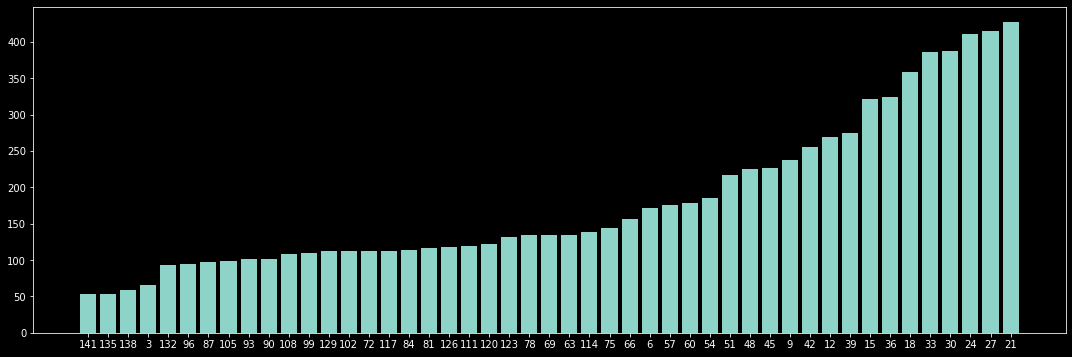

In [11]:
# count how many times these value repeated and sort them
new_dicts = get_keys_that_val_gr_than_num(num_of_words_in_each_text, 50)
keys = list(new_dicts.keys())
values = list(new_dicts.values())
plt.style.use('dark_background')
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.bar(range(len(new_dicts)), values, tick_label=keys)
plt.show()

# Our CBOW Word2Vec Model

In [12]:
our_word2vec_model = load_word2vec_model("../word2vec_models/rezk/skipgram/skip_gram_fullgram_vec_size_300-d_min_count_100")

In [13]:
number_of_features = 300
max_len_str = 237
word2vec_path = "rezk/skipgram/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[ 0.008156  -0.08453    0.03537    0.00923    0.0807     0.2108
 -0.006214   0.01746    0.049     -0.10333   -0.2007     0.006237
 -0.0006533 -0.06323   -0.0677    -0.0913     0.01408    0.0712
  0.1635    -0.1121    -0.02573    0.09314   -0.0284    -0.1376
 -0.0798     0.1914    -0.04672   -0.09625   -0.0679    -0.001663
  0.05865    0.1714     0.07465    0.0663    -0.0339    -0.0124
  0.06396   -0.02417   -0.0332     0.02142   -0.14      -0.05414
  0.2487     0.11725    0.0888     0.03806   -0.04465    0.06714
 -0.02675   -0.09607  ]
(177, 237, 300)
(177, 71100)
[ 0.0007834  0.0814    -0.1329    -0.01324    0.2133    -0.04483
  0.01295    0.156     -0.04376   -0.10297   -0.2319     0.1376
  0.1605     0.1573    -0.00834    0.10626    0.3535    -0.01682
  0.092     -0.0674     0.02274    0.01344   -0.2095    -0.08325
 -0.12317   -0.0369     0.04898    0.0462    -0.04883    0.07
 -0.1993     0.2112    -0.1326     0.1997    -0.2286    -0.0843
  0.01085    

In [14]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  4.53500D+02


 This problem is unconstrained.



At iterate   50    f=  3.31619D+02    |proj g|=  4.00383D-01

At iterate  100    f=  3.29189D+02    |proj g|=  3.18033D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    112      1     0     0   3.180D-02   3.292D+02
  F =   329.18878754729928     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished


===================== Validate Result =====================
F1 score is:  0.8983050847457628
It takes to run:  0:01:20.766623
[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -65.664943
nSV = 2945
===================== Validate Result =====================
F1 score is:  0.9152542372881356
It takes to run:  0:00:20.419798


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.353824
nSV = 8330
[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.429031
nSV = 8566
[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.440401
nSV = 8641
[LibLinear]
optimization finished, #iter = 9
Objective value = -0.462655
nSV = 8643
[LibLinear]
optimization finished, #iter = 9
Objective value = -0.441527
nSV = 8643
===================== Validate Result =====================
F1 score is:  0.9209039548022597
It takes to run:  0:01:07.201773
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0306           0.1266           24.19s
         2           0.8241           0.0249           21.17s
         3           0.8327           0.0100           18.75s
         4           0.8603           0.0003           15.98s
         5           0.7063          -0.0445           13.20s
         6           0.7759          -0.0887           10.95s
         7

In [15]:
bakr_word2vec_model = load_word2vec_model("../word2vec_models/bakr/skipgram/full_grams_sg_300_twitter.mdl")

In [16]:
word2vec_path = "bakr/skipgram/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[ 0.279   -0.4744   0.201    0.0871  -0.266   -0.02853  0.3115   0.12494
  0.1948  -0.1619  -0.409   -0.1619   0.08344 -0.04764 -0.2883  -0.2615
 -0.4858   0.1809   0.02391 -0.09     0.0344  -0.0568  -0.5693  -0.01666
 -0.0409  -0.0613   0.4429  -0.0857   0.1624  -0.0934   0.2664   0.1764
  0.4746  -0.00742 -0.2559   0.2627   0.12305  0.1438   0.3704   0.3435
  0.1151  -0.03065  0.09247  0.2607   0.00447 -0.08984 -0.0366  -0.3008
  0.3728   0.1748 ]
(177, 237, 300)
(177, 71100)
[ 0.2532  -0.0778   0.1276   0.09094  0.2656   0.0634  -0.10144 -0.0908
 -0.075    0.1096  -0.3264   0.3098   0.2363   0.2754  -0.1204  -0.2435
 -0.05798  0.01956  0.08075 -0.098   -0.08594 -0.1987  -0.4246  -0.09045
 -0.258    0.0993   0.499    0.03476 -0.1401  -0.1567  -0.3396  -0.2401
 -0.01701  0.2805  -0.2097  -0.1472  -0.546    0.1606   0.4045   0.1226
  0.1555  -0.00807 -0.1664   0.1514  -0.04324  0.0869  -0.0583   0.076
  0.711    0.2537 ]
(8643, 71100)
(177, 71100)


In [17]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  4.53500D+02


 This problem is unconstrained.



At iterate   50    f=  2.07229D+02    |proj g|=  3.81869D+00

At iterate  100    f=  2.05108D+02    |proj g|=  6.67747D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    109      1     0     0   6.677D-02   2.051D+02
  F =   205.10782542652319     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished


===================== Validate Result =====================
F1 score is:  0.9096045197740112
It takes to run:  0:01:14.479967
[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -36.400209
nSV = 2812
===================== Validate Result =====================
F1 score is:  0.8700564971751411
It takes to run:  0:00:11.023756


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.314552
nSV = 8194
[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.403805
nSV = 8593
[LibLinear].
optimization finished, #iter = 10
Objective value = -0.412834
nSV = 8643
[LibLinear]
optimization finished, #iter = 9
Objective value = -0.432213
nSV = 8643
[LibLinear]
optimization finished, #iter = 9
Objective value = -0.447963
nSV = 8643
===================== Validate Result =====================
F1 score is:  0.8926553672316384
It takes to run:  0:01:09.945478
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9808           0.0442           22.34s
         2           0.8682          -0.0172           19.97s
         3           1.0214           0.0222           18.17s
         4           0.7769          -0.0559           15.19s
         5           0.8573          -0.0372           12.62s
         6           0.7977          -0.0425           10.03s
         7 

In [18]:
muhammed_word2vec_model = load_word2vec_model("../word2vec_models/muhammed/skipgram/w2v_SG_300_3_400_10.model")

In [19]:
word2vec_path = "muhammed/skipgram/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[-0.0379  -0.1837  -0.0934  -0.0988   0.4038   0.02017  0.1588  -0.0968
 -0.1494  -0.2002   0.0888  -0.1522  -0.1013   0.298    0.1655   0.0675
 -0.01991 -0.0819   0.1672  -0.365   -0.02446  0.00798 -0.1383  -0.3484
 -0.0948  -0.2808   0.3672  -0.03967 -0.1324   0.125    0.2316   0.1189
 -0.2778  -0.2646   0.1465   0.339   -0.2235   0.3135  -0.2786   0.2595
 -0.3696   0.186   -0.0839  -0.2432   0.01162 -0.1598  -0.00777  0.1766
 -0.3286  -0.2349 ]
(177, 237, 300)
(177, 71100)
[-6.3599e-02  1.1377e-01 -5.6458e-02 -1.2177e-01 -4.0186e-01  7.7271e-02
  9.2407e-02 -2.4673e-02  1.9073e-04 -2.8735e-01 -2.4353e-01 -2.0984e-01
 -2.2192e-01  1.0034e-01  8.5388e-02  4.5105e-02  1.1462e-01 -3.9600e-01
  4.9561e-02  1.4832e-02  1.7871e-01 -4.1406e-01 -4.2694e-02 -1.1284e-02
  4.4922e-01 -4.5459e-01  9.7168e-02  2.2858e-02 -1.6089e-01  4.5825e-01
 -1.0907e-01 -1.7554e-01 -3.3173e-02 -1.7285e-01 -2.6147e-01 -5.1971e-02
 -2.4927e-01  2.1008e-01  6.9336e-02  3.2788e-01  

In [20]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

 

print("=" * 50)

model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)

#  Gradient Boosting

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  4.53500D+02


 This problem is unconstrained.



At iterate   50    f=  4.24345D+02    |proj g|=  1.40192D+00

At iterate  100    f=  4.17833D+02    |proj g|=  1.13962D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    111      1     0     0   1.140D-01   4.178D+02
  F =   417.83264932043767     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


===================== Validate Result =====================
F1 score is:  0.8587570621468926
It takes to run:  0:01:19.257946
[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -100.079583
nSV = 3015
===================== Validate Result =====================
F1 score is:  0.8418079096045198
It takes to run:  0:00:10.088058


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.352785
nSV = 8527
[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.433959
nSV = 8640
[LibLinear]
optimization finished, #iter = 9
Objective value = -0.440444
nSV = 8643
[LibLinear].
optimization finished, #iter = 10
Objective value = -0.456796
nSV = 8643
[LibLinear].
optimization finished, #iter = 10
Objective value = -0.468298
nSV = 8643
===================== Validate Result =====================
F1 score is:  0.847457627118644
It takes to run:  0:01:12.320355
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9916           0.0284           17.73s
         2           0.9685           0.0177           16.62s
         3           1.0013           0.0272           15.03s
         4           0.8883          -0.0231           12.83s
         5           0.9354          -0.4394           10.70s
         6           1.1884          -0.0770            8.58s
         7

# Load best model & predict test set

In [21]:
strat_test_set = read_file("test/strat_test_set.csv")
strat_test_set.head()

,label,text
0,1,حساء خفافيش الصين ابداع القرف يعني
1,1,اجراءات هكذا استعدت مصر لمواجهه فيروس كورونا م...
2,1,ايش الفايده لابس كمامات ومو لابس قفازات
3,0,الجدير بالذكر ان في الصين بيستخدموا ال في كل ح...
4,0,ولو ترسل صواريخ الصين وقفنا دون برج الفيصليه


In [22]:
X_test_text = list(strat_test_set['text'])
y_test = strat_test_set['label'].values

In [23]:
X_test_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(X_test_text)

print("Before Tokenization : \n", X_test_text[:3])
print("="*50)
print("After Tokenization : \n", X_test_text_tokenized[:3])
print("="*50)

fullgram_X_test_text_tokenized = get_all_ngrams(X_test_text_tokenized)
print("full gram tokenization : \n", fullgram_X_test_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['حساء خفافيش الصين ابداع القرف يعني', 'اجراءات هكذا استعدت مصر لمواجهه فيروس كورونا مرايتي', 'ايش الفايده لابس كمامات ومو لابس قفازات']
After Tokenization : 
 [['حساء', 'خفافيش', 'الصين', 'ابداع', 'القرف', 'يعني'], ['اجراءات', 'هكذا', 'استعدت', 'مصر', 'لمواجهه', 'فيروس', 'كورونا', 'مرايتي'], ['ايش', 'الفايده', 'لابس', 'كمامات', 'ومو', 'لابس', 'قفازات']]
full gram tokenization : 
 [['حساء', 'خفافيش', 'الصين', 'ابداع', 'القرف', 'يعني', 'حساء_خفافيش', 'خفافيش_الصين', 'الصين_ابداع', 'ابداع_القرف', 'القرف_يعني', 'حساء_خفافيش_الصين', 'خفافيش_الصين_ابداع', 'الصين_ابداع_القرف', 'ابداع_القرف_يعني'], ['اجراءات', 'هكذا', 'استعدت', 'مصر', 'لمواجهه', 'فيروس', 'كورونا', 'مرايتي', 'اجراءات_هكذا', 'هكذا_استعدت', 'استعدت_مصر', 'مصر_لمواجهه', 'لمواجهه_فيروس', 'فيروس_كورونا', 'كورونا_مرايتي', 'اجراءات_هكذا_استعدت', 'هكذا_استعدت_مصر', 'استعدت_مصر_لمواجهه', 'مصر_لمواجهه_فيروس', 'لمواجهه_فيروس_كورونا', 'فيروس_كورونا_مرايتي'], ['ايش', 'الفايده', 'لابس', 'كمامات', 'ومو', 'لابس', 'قفاز

In [26]:
rezk_model = pickle_load_model("../ml_models_saved/rezk/skipgram/LinearSVC__f1_0.915_ml.sav"  )
bakr_model = pickle_load_model("../ml_models_saved/bakr/skipgram/LinearSVC__f1_0.87_ml.sav"  )
muhammed_model = pickle_load_model("../ml_models_saved/muhammed/skipgram/LinearSVC__f1_0.842_ml.sav"  )

X_test_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(rezk_model, X_test_embed_matrix, y_test)
print("="*50)

X_test_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(bakr_model, X_test_embed_matrix, y_test)
print("="*50)

X_test_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(muhammed_model, X_test_embed_matrix, y_test)

(180, 237, 300)
(180, 71100)
[-0.3037    0.03827  -0.004025 -0.0968    0.05286  -0.00997  -0.06903
 -0.06433   0.02005   0.07227  -0.1332   -0.07794   0.1536    0.04587
  0.08704   0.0472    0.2114    0.06976   0.2278   -0.05112  -0.1252
  0.2245   -0.074    -0.0952   -0.0999    0.3381    0.1605    0.1802
 -0.1344    0.2656    0.2656   -0.06714   0.04456  -0.3032   -0.2637
 -0.1727   -0.0866   -0.02652  -0.136     0.2303   -0.4177   -0.06604
  0.0807    0.1836    0.02768   0.22     -0.131    -0.1024   -0.163
 -0.0965  ]
===================== Validate Result =====================
F1 score is:  0.8722222222222223
(180, 237, 300)
(180, 71100)
[-0.5947  -0.3875   0.5137   0.441   -0.2095   0.1722   0.611    0.2908
 -0.1891  -0.28    -0.459    0.5054   0.1313   0.4534   0.3525  -0.589
 -0.4766   0.01225 -0.6724   0.137    0.1708  -0.4487  -0.03247 -0.1746
 -0.3828  -0.334    0.2788  -0.09674  0.01059  0.1343  -0.0972   0.2827
 -0.0361  -0.1512  -0.4792  -0.02391  0.3184   0.394    0.4019   

0.839

# Qualitative Evaluation

In [27]:
print("The number of words the model learn from your dataset are:", len(list(our_word2vec_model.wv.index_to_key)))
print("The number of words the model learn from your dataset are:", len(list(bakr_word2vec_model.wv.index_to_key)))
print("The number of words the model learn from your dataset are:", len(list(muhammed_word2vec_model.wv.index_to_key)))

The number of words the model learn from your dataset are: 2027042
The number of words the model learn from your dataset are: 1476715
The number of words the model learn from your dataset are: 49555


In [28]:
our_word2vec_model.wv.most_similar('قابس')

[('بحري', 0.5477318167686462),
 ('مخزن', 0.5447487831115723),
 ('شاحنات', 0.5261797308921814),
 ('خرطوم', 0.5093061923980713),
 ('غاز', 0.5068048238754272),
 ('انبوب', 0.5056734085083008),
 ('عربات', 0.5041817426681519),
 ('عمارات', 0.5010378956794739),
 ('الخرطوم', 0.5004208087921143),
 ('عربه', 0.4997750222682953)]

In [29]:
bakr_word2vec_model.wv.most_similar('قابس')

[('جندوبه', 0.6397514939308167),
 ('تطاوين', 0.6282303929328918),
 ('صفاقس', 0.6072751879692078),
 ('المنستير', 0.5866954922676086),
 ('قرمده', 0.58547443151474),
 ('سليانه', 0.5802640318870544),
 ('اكادير', 0.5801235437393188),
 ('بالقصرين', 0.5779569745063782),
 ('سيدي_بوزيد', 0.5738011002540588),
 ('بنقردان', 0.572603702545166)]

In [30]:
muhammed_word2vec_model.wv.most_similar('قابس')

KeyError: "Key 'قابس' not present in vocabulary"

In [ ]:
our_word2vec_model.wv.most_similar('طنطا')

In [ ]:
bakr_word2vec_model.wv.most_similar('طنطا')

In [ ]:
muhammed_word2vec_model.wv.most_similar('طنطا')

In [ ]:
our_word2vec_model.wv.most_similar('فندق')

In [ ]:
bakr_word2vec_model.wv.most_similar('فندق')

In [ ]:
muhammed_word2vec_model.wv.most_similar('فندق')

In [ ]:
our_word2vec_model.wv.most_similar('🤣')

In [ ]:
bakr_word2vec_model.wv.most_similar('🤣')

In [31]:
muhammed_word2vec_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [32]:
our_word2vec_model.wv.most_similar('🇰🇼')

[('العيد_الوطني_الكويتي', 0.7552661299705505),
 ('🇴🇲', 0.7520380616188049),
 ('🇧🇭', 0.7141936421394348),
 ('🇦🇪', 0.7132868766784668),
 ('كويت', 0.6831528544425964),
 ('اليوم_الوطني_الكويتي', 0.6795424222946167),
 ('🇶🇦', 0.6780518889427185),
 ('🇸🇦', 0.6583344340324402),
 ('🇯🇴', 0.6091884970664978),
 ('الحبيبه', 0.6050938367843628)]

In [33]:
bakr_word2vec_model.wv.most_similar('🇰🇼')

[('الكويت', 0.5591772198677063),
 ('ومثلتم', 0.5206083059310913),
 ('احفظ_الكويت_واميرها', 0.5198094844818115),
 ('واميرها_وشعبها_من', 0.5154067873954773),
 ('🇰🇼🇰🇼🇰🇼', 0.5022031664848328),
 ('الكويت_قويه', 0.49817347526550293),
 ('الكويت🇰🇼', 0.4951614737510681),
 ('الكويت_الحبيبه', 0.4922771155834198),
 ('لعضويتنا', 0.4853020906448364),
 ('الكويت_واهلها', 0.4852806329727173)]

In [34]:
muhammed_word2vec_model.wv.most_similar('🇰🇼')

KeyError: "Key '🇰🇼' not present in vocabulary"

In [35]:
our_word2vec_model.wv.most_similar('IT')

[('تخصص', 0.6530670523643494),
 ('HR', 0.6461331844329834),
 ('تخصصات', 0.645728349685669),
 ('الهندسه', 0.6386619806289673),
 ('البرمجه', 0.6241384148597717),
 ('دبلوم', 0.6186401844024658),
 ('AI', 0.6148325204849243),
 ('تخصصي', 0.6145172119140625),
 ('كورس', 0.6139078736305237),
 ('marketing', 0.6092138886451721)]

In [36]:
bakr_word2vec_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [37]:
muhammed_word2vec_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [38]:
our_word2vec_model.wv.most_similar('؟')

[('🤔', 0.859015166759491),
 ('!', 0.8566986322402954),
 ('ايش', 0.7453765869140625),
 ('كيف', 0.7345700860023499),
 ('بالضبط', 0.7344685792922974),
 ('🙄', 0.7337287068367004),
 ('😕', 0.7293244004249573),
 ('هل', 0.7286097407341003),
 ('ليش', 0.7276320457458496),
 ('وين', 0.7253206968307495)]

In [39]:
bakr_word2vec_model.wv.most_similar('؟')

[('!', 0.6516785025596619),
 ('وجعوج', 0.5592733025550842),
 ('`والمستغفرين', 0.5453335642814636),
 ('😳', 0.5365201830863953),
 ('عربي_بالمدارس_☺', 0.5336927175521851),
 ('شايفينا_هنود☺', 0.5334914326667786),
 ('اسامحك👨', 0.5334856510162354),
 ('الجنانذات', 0.5273258686065674),
 ('ذنوبك☁', 0.52655428647995),
 ('خانوج', 0.5256090760231018)]

In [40]:
muhammed_word2vec_model.wv.most_similar('؟')

KeyError: "Key '؟' not present in vocabulary"

In [41]:
our_word2vec_model.wv.most_similar('🌸')

[('🌷', 0.883251965045929),
 ('🌹', 0.8779526352882385),
 ('🌼', 0.8770474791526794),
 ('🌺', 0.8738604784011841),
 ('🌻', 0.8657661080360413),
 ('🕊', 0.8314341306686401),
 ('🍃', 0.8309021592140198),
 ('💞', 0.8259140849113464),
 ('🕊️', 0.8252202868461609),
 ('🌿', 0.8031659126281738)]

In [42]:
bakr_word2vec_model.wv.most_similar('🌸')

[('🍃', 0.8955678343772888),
 ('💜', 0.8774383068084717),
 ('💕', 0.8764846324920654),
 ('💗', 0.8685916662216187),
 ('✨', 0.8499574661254883),
 ('🍁', 0.8428829312324524),
 ('💞', 0.839942455291748),
 ('🌿', 0.839326024055481),
 ('🍂', 0.8385370373725891),
 ('💓', 0.8380874395370483)]

In [43]:
muhammed_word2vec_model.wv.most_similar('🌸')

KeyError: "Key '🌸' not present in vocabulary"

In [44]:
our_word2vec_model.wv.most_similar('لقاح_كورونا')

[('لقاح_فايزر', 0.8071855306625366),
 ('لقاح_استرازينيكا', 0.8052717447280884),
 ('لقاح_اكسفورد', 0.8028921484947205),
 ('لقاح_#', 0.7768087983131409),
 ('من_لقاح', 0.7750630378723145),
 ('لقاحات_كورونا', 0.7649125456809998),
 ('لقاح_استرازينكا', 0.7414705753326416),
 ('لفيروس_كورونا', 0.7378163933753967),
 ('تطعيم_كورونا', 0.7282854318618774),
 ('ضد_كورونا', 0.7269201874732971)]

In [45]:
bakr_word2vec_model.wv.most_similar('لقاح_كورونا')

KeyError: "Key 'لقاح_كورونا' not present in vocabulary"

In [46]:
muhammed_word2vec_model.wv.most_similar('لقاح_كورونا')

KeyError: "Key 'لقاح_كورونا' not present in vocabulary"

In [47]:
our_word2vec_model.wv.most_similar('covid')

[('Covid', 0.723892867565155),
 ('كوفيد_', 0.7223595976829529),
 ('كوفيد', 0.639966607093811),
 ('coronavirus', 0.6211643815040588),
 ('كوفيد-', 0.6099029779434204),
 ('19', 0.5965123176574707),
 ('فيروس', 0.5947990417480469),
 ('كورونا', 0.5896413922309875),
 ('Pfizer', 0.587608277797699),
 ('COVID', 0.5793454647064209)]

In [48]:
bakr_word2vec_model.wv.most_similar('covid')

KeyError: "Key 'covid' not present in vocabulary"

In [49]:
muhammed_word2vec_model.wv.most_similar('covid')

KeyError: "Key 'covid' not present in vocabulary"

In [50]:
our_word2vec_model.wv.most_similar('covid_19')

[('#_كوفيد_', 0.7184076905250549),
 ('كوفيد__19', 0.6838507056236267),
 ('COVID_19', 0.6617117524147034),
 ('كورونا_#', 0.6430616974830627),
 ('#_لقاح_كورونا', 0.6309927701950073),
 ('كوفيد_19', 0.6203495264053345),
 ('#_كورونا', 0.6153684854507446),
 ('#_كوفيد', 0.6150749325752258),
 ('19_#', 0.6079955697059631),
 ('covid__', 0.6055033802986145)]

In [51]:
bakr_word2vec_model.wv.most_similar('covid_19')

KeyError: "Key 'covid_19' not present in vocabulary"

In [52]:
muhammed_word2vec_model.wv.most_similar('covid_19')

KeyError: "Key 'covid_19' not present in vocabulary"

In [53]:
our_word2vec_model.wv.most_similar('بايدن')

[('ترامب', 0.8898261189460754),
 ('ترمب', 0.8642411231994629),
 ('نتنياهو', 0.849520206451416),
 ('بوتين', 0.8475865721702576),
 ('اردوغان', 0.8198335766792297),
 ('الاميركي', 0.8120449781417847),
 ('ماكرون', 0.8070845007896423),
 ('بايدن،', 0.8035918474197388),
 ('الكونغرس', 0.79802006483078),
 ('واشنطن', 0.7959909439086914)]

In [54]:
bakr_word2vec_model.wv.most_similar('بايدن')

[('نائب_الرئيس_الاميركي', 0.6508957743644714),
 ('فيسترفيلله', 0.6415755152702332),
 ('اوباما', 0.6287881135940552),
 ('بارزاني', 0.6216580271720886),
 ('سولانا', 0.6143020391464233),
 ('شتاينماير', 0.6121611595153809),
 ('كلينتون', 0.6094216704368591),
 ('بسالفا', 0.6073554754257202),
 ('الرئيس_الاميركي', 0.6065713763237),
 ('كرزاي', 0.6018709540367126)]

In [55]:
muhammed_word2vec_model.wv.most_similar('بايدن')

KeyError: "Key 'بايدن' not present in vocabulary"

In [56]:
our_word2vec_model.wv.most_similar('في_صحيح_البخاري')

[('من_اهل_العلم', 0.5882464647293091),
 ('في_الحديث_الصحيح', 0.5836180448532104),
 ('رضي_الله_عنه،', 0.5819680094718933),
 ('من_رسول_الله', 0.5724356770515442),
 ('رضي_الله_عنهم', 0.5712218880653381),
 ('قال_:_(', 0.5698107481002808),
 ('النبي_صلي_الله', 0.5636171698570251),
 ('رسول_الله_صلي', 0.563256025314331),
 ('كما_جاء_في', 0.5609081983566284),
 ('عبد_الله_بن', 0.560250461101532)]

In [57]:
bakr_word2vec_model.wv.most_similar('في_صحيح_البخاري')

KeyError: "Key 'في_صحيح_البخاري' not present in vocabulary"

In [58]:
muhammed_word2vec_model.wv.most_similar('في_صحيح_البخاري')

KeyError: "Key 'في_صحيح_البخاري' not present in vocabulary"

In [59]:
our_word2vec_model.wv.most_similar('الي_يوم_القيامه')

[('الله_يوم_القيامه', 0.6776920557022095),
 ('يوم_القيامه_و', 0.6676861047744751),
 ('يوم_القيامه_.', 0.6396552324295044),
 ('يوم_القيامه_رابطويب', 0.6324991583824158),
 ('يوم_القيامه_#', 0.6315894722938538),
 ('القيامه_._.', 0.6287968754768372),
 ('يوم_القيامه_،', 0.6215853691101074),
 ('حتي_يوم_القيامه', 0.6007744669914246),
 ('له_يوم_القيامه', 0.5959672927856445),
 ('ص_)_:', 0.5819828510284424)]

In [60]:
bakr_word2vec_model.wv.most_similar('الي_يوم_القيامه')

KeyError: "Key 'الي_يوم_القيامه' not present in vocabulary"

In [ ]:
muhammed_word2vec_model.wv.most_similar('الي_يوم_القيامه')

In [ ]:
our_word2vec_model.wv.most_similar('اليهود_الصهاينه')

In [ ]:
bakr_word2vec_model.wv.most_similar('اليهود_الصهاينه')

In [61]:
muhammed_word2vec_model.wv.most_similar('اليهود_الصهاينه')

KeyError: "Key 'اليهود_الصهاينه' not present in vocabulary"

In [62]:
our_word2vec_model.wv.most_similar('بن_خلدون')

[('ابن_خلدون', 0.5176362991333008),
 ('يوسف_بن', 0.5077011585235596),
 ('نسبه_الي', 0.5056132078170776),
 ('بن_نصير', 0.5010973215103149),
 ('بن_زياد', 0.4948781430721283),
 ('بن_سليمان', 0.4913366138935089),
 ('بن_عيسي', 0.48702308535575867),
 ('بن_مسلم', 0.4860471487045288),
 ('في_عهد', 0.4858626425266266),
 ('الحسن_الثاني', 0.48367419838905334)]

In [63]:
bakr_word2vec_model.wv.most_similar('بن_خلدون')

KeyError: "Key 'بن_خلدون' not present in vocabulary"

In [64]:
muhammed_word2vec_model.wv.most_similar('بن_خلدون')

KeyError: "Key 'بن_خلدون' not present in vocabulary"

In [65]:
from word2vec_results import *

[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 1.454016
[t-SNE] KL divergence after 100 iterations with early exaggeration: 35.981827
[t-SNE] KL divergence after 150 iterations: 0.531279
The shape of our word_features is: (19, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


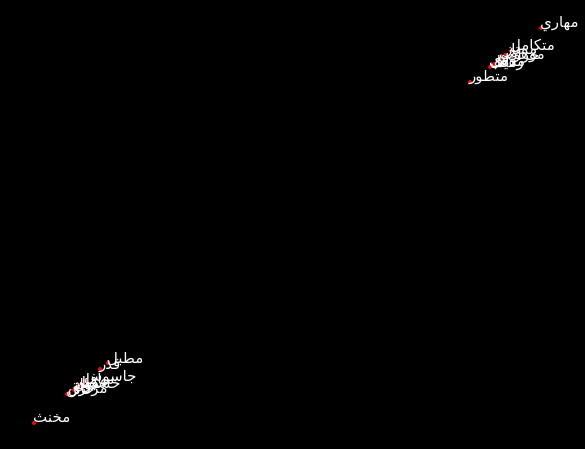

In [66]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

In [67]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(muhammed_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'خائن' not present"

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 2.240841
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.060547
[t-SNE] KL divergence after 500 iterations: 0.046975
The shape of our word_features is: (19, 2)


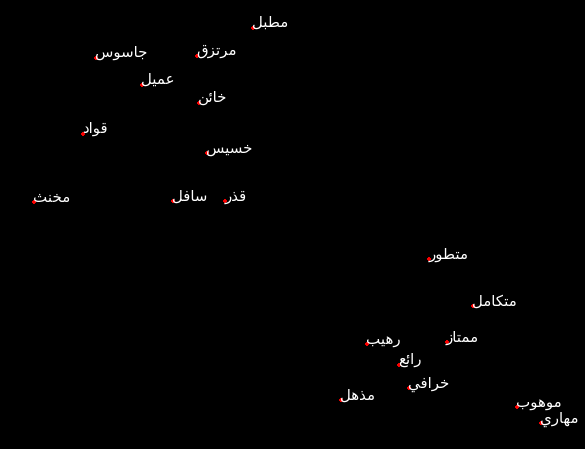

In [68]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(bakr_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.000s...
[t-SNE] Computed neighbors for 65 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 1.246671
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.159286
[t-SNE] KL divergence after 1400 iterations: 0.188104
The shape of our word_features is: (65, 2)


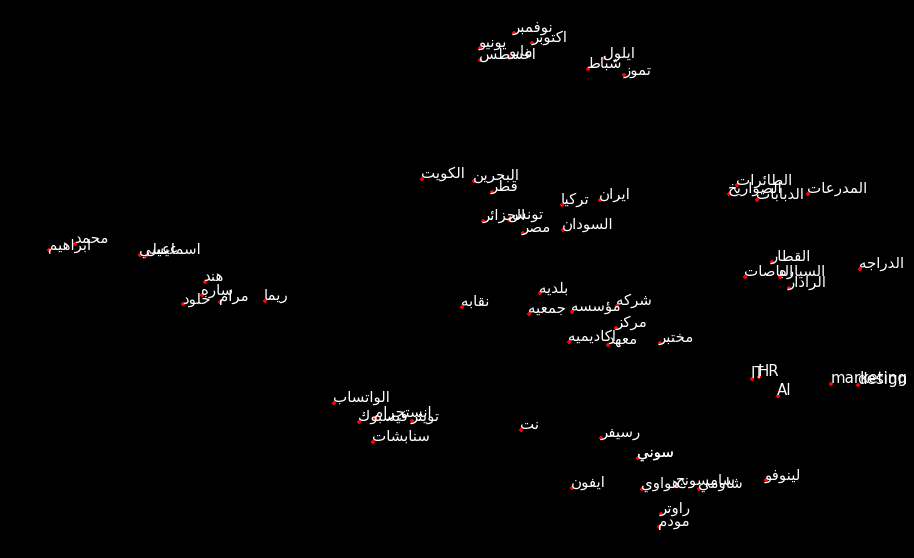

In [69]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

In [70]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(bakr_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'IT' not present"

In [71]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(muhammed_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'IT' not present"